# Diabetes_Prediction_with_ANN
##### Mayank Srivastava

- <small>[![LinkedIn](https://img.shields.io/badge/LinkedIn-Connect-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/mayank-srivastava-6a8421105/)</small>

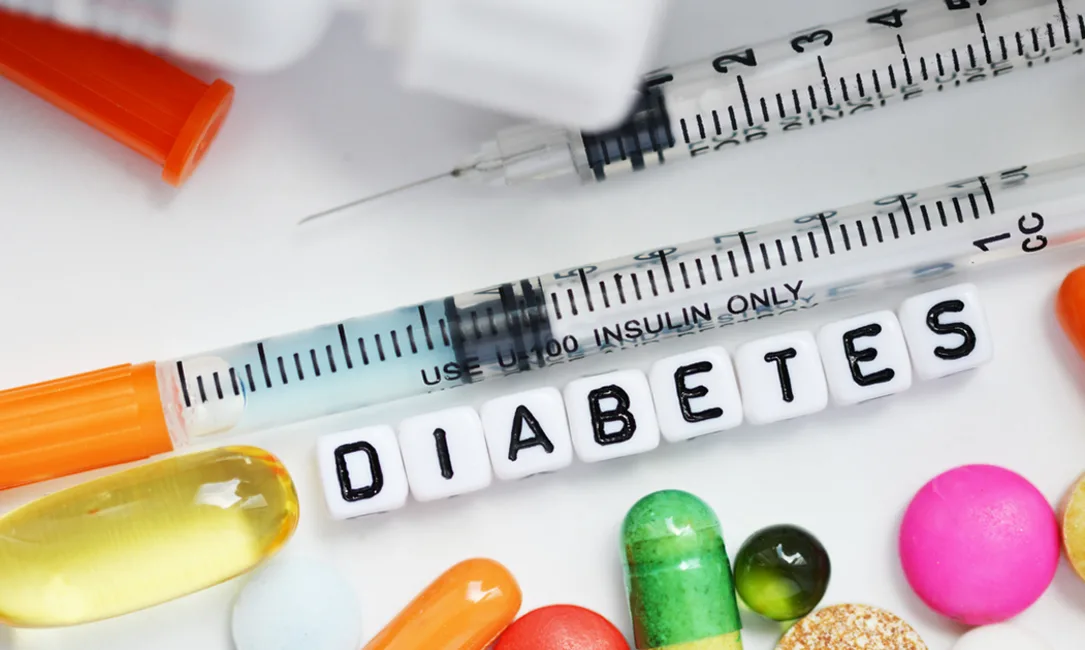

### Pima Indians Diabetes Database

#### Problem: 
- Predict the onset of diabetes based on diagnostic measures

#### Data Source: 
- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Content
- The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from sklearn.metrics import recall_score,confusion_matrix,roc_auc_score, roc_curve,auc


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

> **Loading the Dataset**

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# checking the descriptive stats fo all features
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# lets check for 0s in each column
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

    Observations:
        1. Pregnancies and Outcome can have zero values based on patient's parameters
        2. But for other variables having ZEROES is not possible

In [7]:
# we will replace 0s with np.NaN
np.NaN

nan

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]]=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]].replace({0:np.NaN})

In [10]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

    Observations:
        1. Pregnancies and Outcome can have zeroe values based on patient's parameters
        2. But other values having ZEROES is not possible

In [11]:
# we will compute all above NaN with column mean values
df.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [12]:
#imputing NaN values
df=df.fillna(df.mean())

    Observations:
        - Dataset has 768 rows x 9 columns
        - Zeroes have been imputed with mean. There are no null/missing values in the dataset.
        - Target column: 'Outcome'
        - All input features are numerical

In [13]:
# Descriptive stats
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


E:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


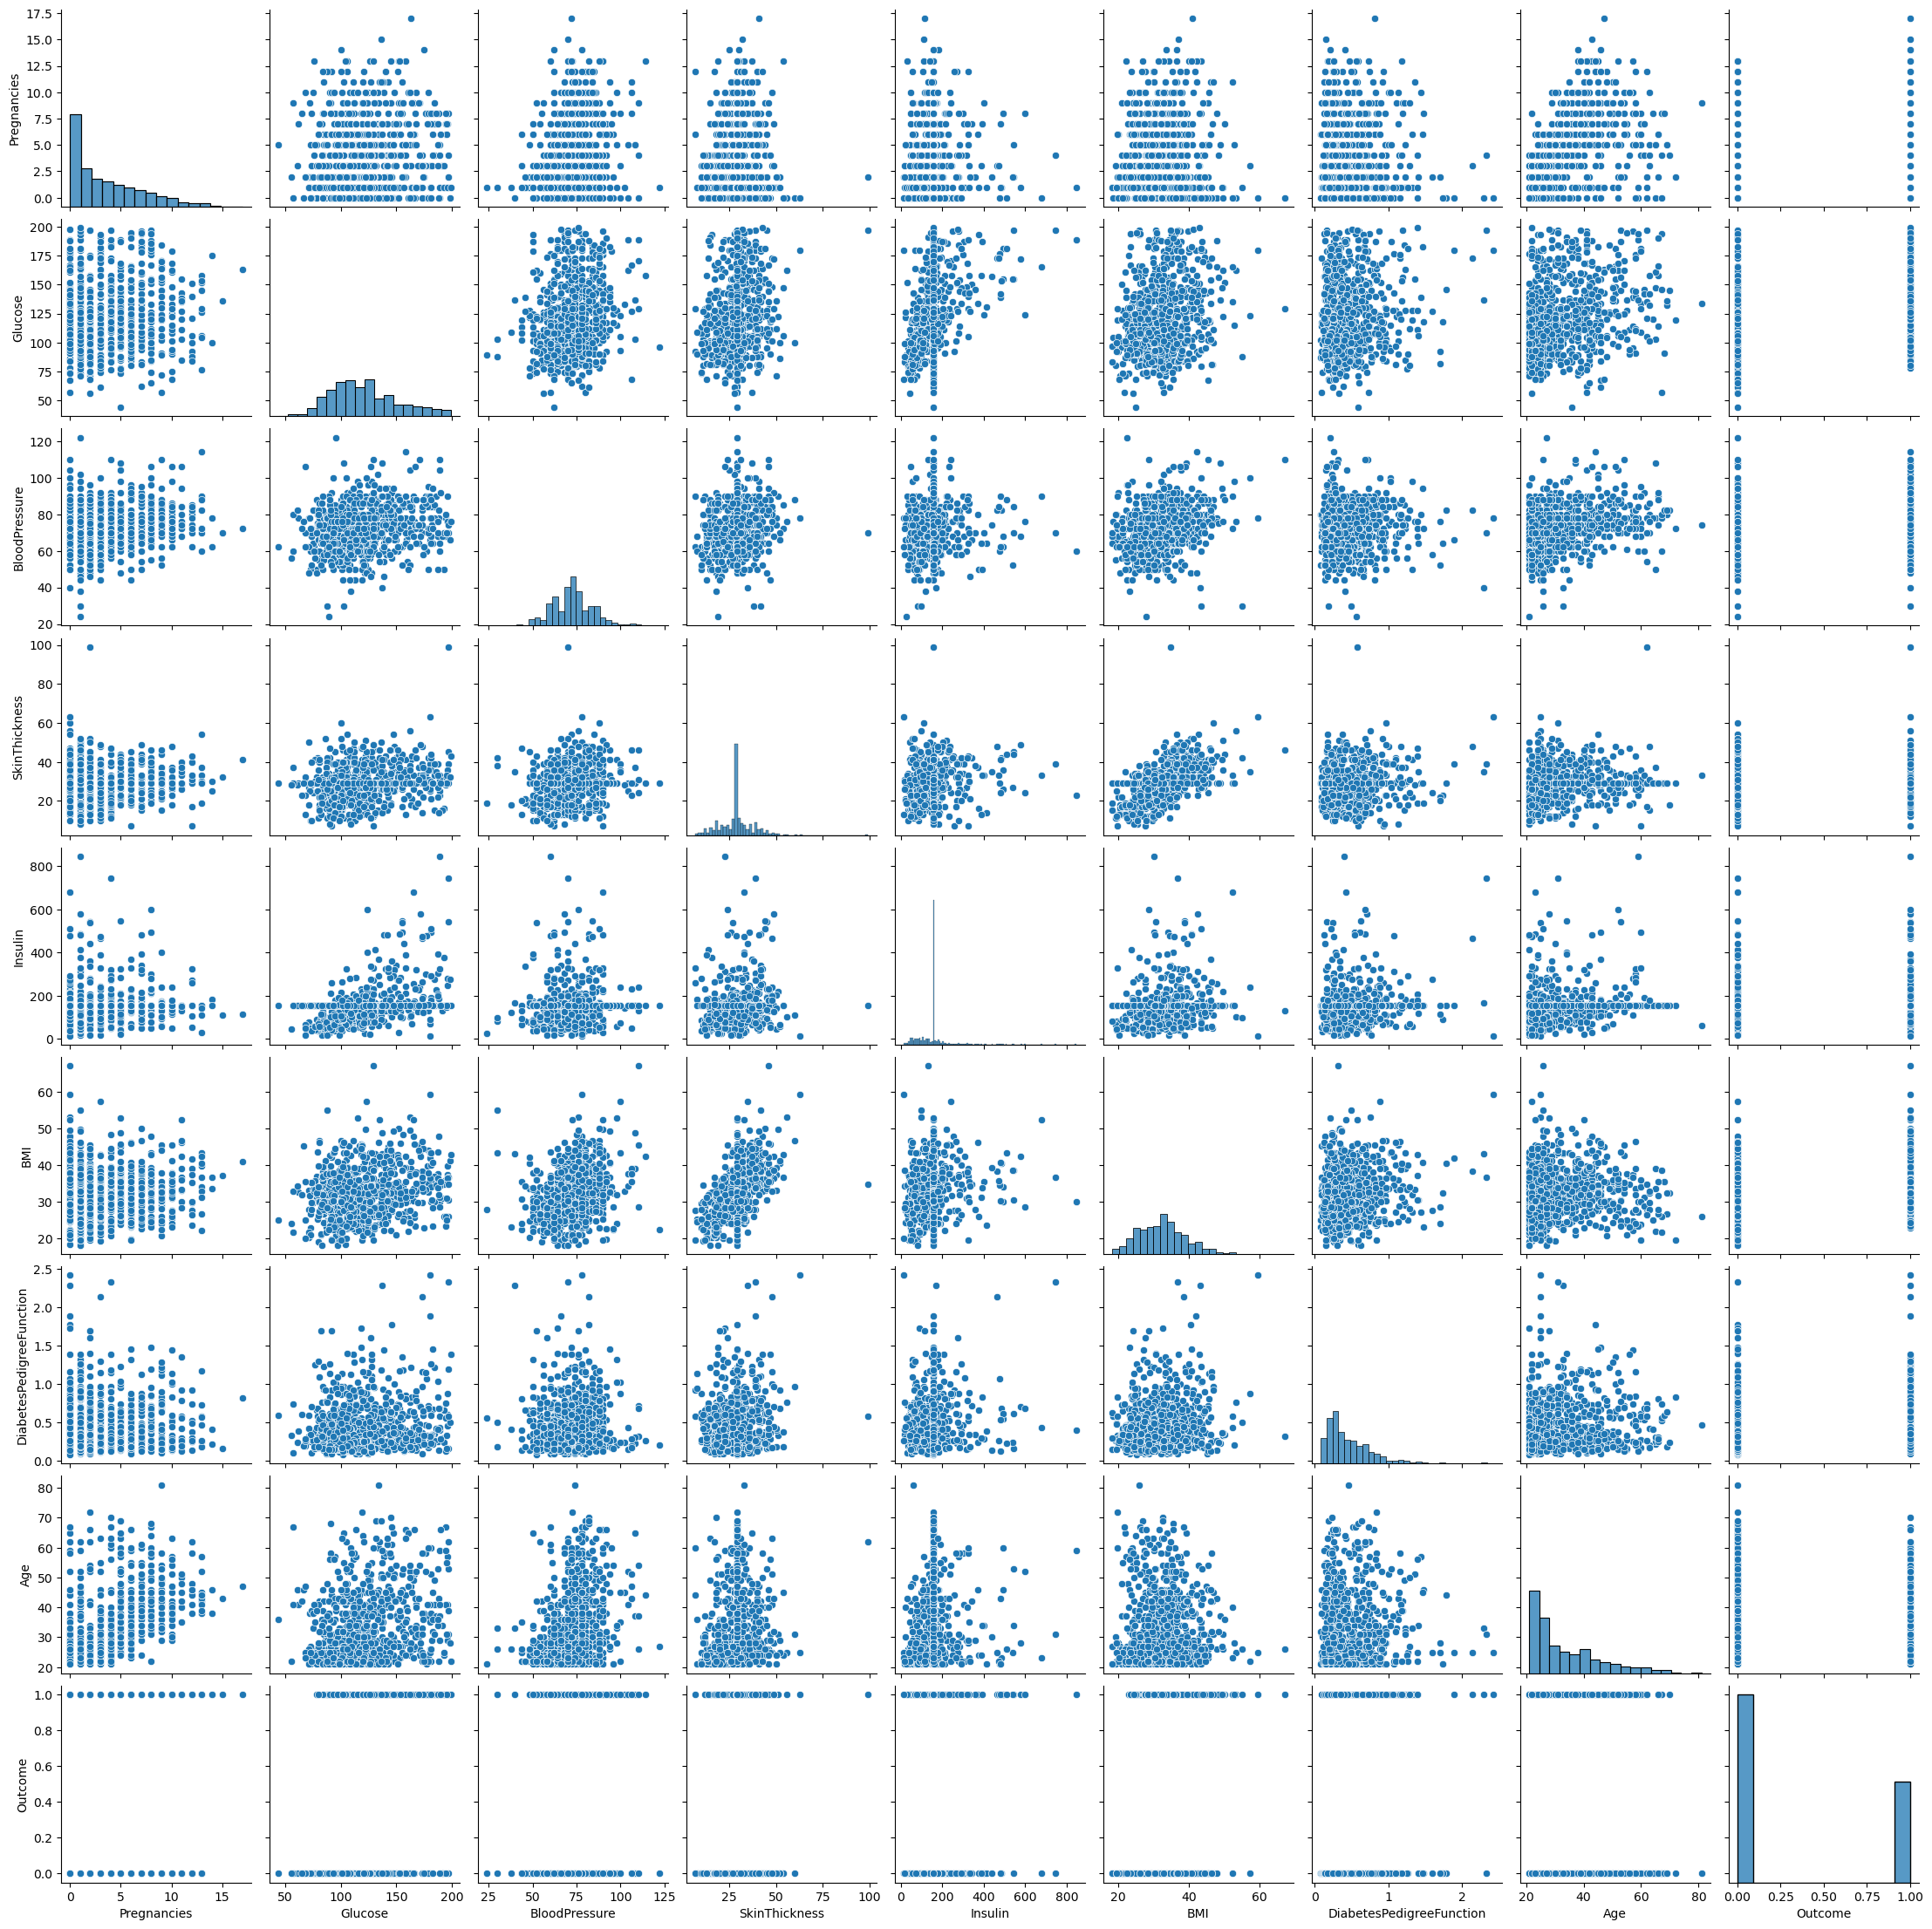

In [14]:
# pairplot 
sns.pairplot(df)
plt.show()

<Axes: >

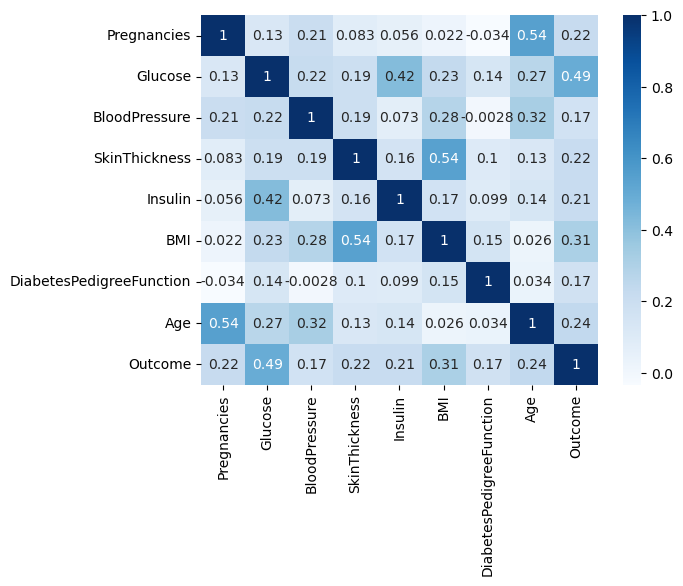

In [15]:
corr= df.corr(numeric_only = True)
sns.heatmap(corr, annot = True, cmap ="Blues")

In [16]:
df.corr().nlargest(4,'Outcome')['Outcome']

Outcome    1.000000
Glucose    0.492928
BMI        0.311924
Age        0.238356
Name: Outcome, dtype: float64

> **Splitting the Dataset**


In [17]:
x= df.drop('Outcome', axis =1)
y=df.Outcome

In [18]:
# checking for imbalance
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [19]:
df.Outcome.value_counts(normalize = True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y, test_size =0.2, random_state =42, stratify =y)

We have used **stratify =y**, to ensure same proportion of positives and negatives in test and train sets, as in the original datset

In [21]:
ytrain.value_counts(normalize=True)

Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64

In [22]:
ytest.value_counts(normalize=True)

Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64

> **Scaling the data**

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [24]:
xtrain.shape, xtest.shape

((614, 8), (154, 8))

In [25]:
xtrain

array([[-0.85135507, -1.0575301 , -0.82797293, ..., -0.76981811,
         0.31079384, -0.79216928],
       [ 0.35657564,  0.14339202,  0.47653222, ..., -0.41783762,
        -0.11643851,  0.56103382],
       [-0.5493724 , -0.55714588, -1.15409922, ...,  0.35945263,
        -0.76486207, -0.70759409],
       ...,
       [-0.85135507, -0.82401747, -0.17572035, ...,  0.82875995,
        -0.78607218, -0.28471812],
       [ 1.86648903, -0.3569922 , -0.17572035, ..., -0.72582055,
        -1.01938346,  0.56103382],
       [ 0.05459296,  0.74385309, -1.15409922, ..., -0.43250348,
        -0.57700104,  0.30730824]])

In [26]:
# Imbalanced --> Balanced
# pip install git+https://github.com/scikit-learn-contrib/imbalanced-learn.git@master


In [27]:
# removing the imbalance
from imblearn.over_sampling import SMOTE

In [28]:

smote=SMOTE()
smote_xtrain, smote_ytrain = smote.fit_resample(xtrain, ytrain)

In [29]:
smote_ytrain.value_counts(normalize =True)
#y-class in trianing data is now balanced

Outcome
0    0.5
1    0.5
Name: proportion, dtype: float64

In [30]:
xtrain.shape, ytrain.shape

((614, 8), (614,))

In [31]:
smote_xtrain.shape, smote_ytrain.shape

((800, 8), (800,))

**our y-class in now balanced, using over-sampling**

In [32]:
# Lets try a ML algorithm, say SVM
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
#'rbf', 'linear', 'precomputed', 'sigmoid', 'poly'
svc.fit(smote_xtrain,smote_ytrain)
train_pred_svc= svc.predict(xtrain)
test_pred_svc =svc.predict(xtest)

from sklearn.metrics import accuracy_score, recall_score
print('Training metrics')
print('accuracy_score: ',accuracy_score(ytrain, train_pred_svc))
print('recall_score: ',recall_score(ytrain, train_pred_svc))
print('Testing metrics')
print('accuracy_score: ',accuracy_score(ytest, test_pred_svc))
print('recall_score: ',recall_score(ytest, test_pred_svc))

Training metrics
accuracy_score:  0.8371335504885994
recall_score:  0.8738317757009346
Testing metrics
accuracy_score:  0.7012987012987013
recall_score:  0.6666666666666666


In [33]:
# plotting the ROC-curve

from sklearn.metrics import roc_auc_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(ytest, test_pred_svc)
roc_auc = auc(fpr, tpr)

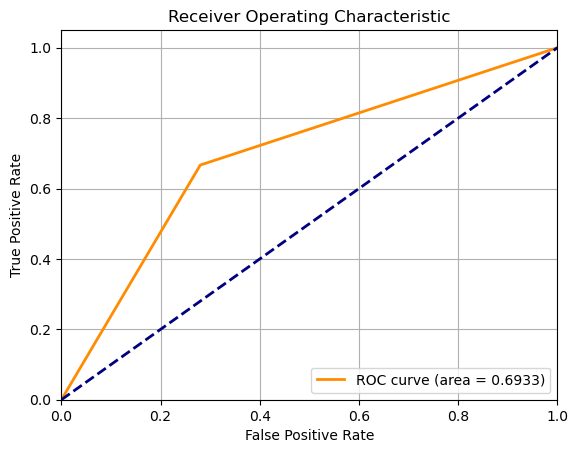

In [34]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})' )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [35]:
auc(fpr,tpr)

0.6933333333333334

In [36]:
# # Lets try a ML algorithm, say DT
# from sklearn.tree import DecisionTreeClassifier
# dt=DecisionTreeClassifier()
# dt.fit(xtrain,ytrain)
# train_pred_dt= dt.predict(xtrain)
# test_pred_dt =dt.predict(xtest)

# from sklearn.metrics import accuracy_score, recall_score
# print('Training metrics')
# print('accuracy_score: ',accuracy_score(ytrain, train_pred_dt))
# print('recall_score: ',recall_score(ytrain, train_pred_dt))
# print('Testing metrics')
# print('accuracy_score: ',accuracy_score(ytest, test_pred_dt))
# print('recall_score: ',recall_score(ytest, test_pred_dt))

> **ANN_Model_Architecture**

In [37]:
# Starting with a simple model

model= Sequential()
model.add(Dense(32, activation ='relu', input_dim=8)) # input layer
# model.add(Dropout(0.5))
model.add(Dense (1, activation ='sigmoid'))

E:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics =['accuracy'])

In [39]:
# Basic model without HP-tuning
# default batch_size if not specified is 32
from tensorflow.keras.callbacks import ModelCheckpoint
# Define ModelCheckpoint callback to save the best weights
checkpoint = ModelCheckpoint(r'best_model.keras', 
                             monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model with ModelCheckpoint callback
history=model.fit(smote_xtrain,smote_ytrain, epochs =100, validation_data=(xtest,ytest), shuffle =False,\
                 callbacks=[checkpoint])

# Load the best weights
model.load_weights('best_model.keras')


Epoch 1/100
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4186 - loss: 0.7373
Epoch 1: val_accuracy improved from -inf to 0.57143, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4243 - loss: 0.7348 - val_accuracy: 0.5714 - val_loss: 0.6878
Epoch 2/100
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5938 - loss: 0.6517
Epoch 2: val_accuracy improved from 0.57143 to 0.62338, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6953 - loss: 0.6532 - val_accuracy: 0.6234 - val_loss: 0.6414
Epoch 3/100
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6562 - loss: 0.6013
Epoch 3: val_accuracy improved from 0.62338 to 0.68831, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7228 - loss: 0.6083 - val_accuracy: 0.6883 - val_loss: 0.6110
Epoch 4/100
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7500 - loss: 0.5656
Epoch 4: val_accuracy did not improve from 0.68

 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6875 - loss: 0.4523
Epoch 26: val_accuracy improved from 0.72727 to 0.73377, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7691 - loss: 0.4580 - val_accuracy: 0.7338 - val_loss: 0.5340
Epoch 27/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7687 - loss: 0.4576 
Epoch 27: val_accuracy did not improve from 0.73377
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7691 - loss: 0.4569 - val_accuracy: 0.7338 - val_loss: 0.5340
Epoch 28/100
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6875 - loss: 0.4542
Epoch 28: val_accuracy did not improve from 0.73377
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7708 - loss: 0.4559 - val_accuracy: 0.7338 - val_loss: 0.5342
Epoch 29/100
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6875 - loss: 0.4554
Epoch 29: val_accuracy did not improve from 0.73377
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7708 - loss: 0.4550 -

Epoch 52/100
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6875 - loss: 0.4821
Epoch 52: val_accuracy did not improve from 0.73377
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7827 - loss: 0.4414 - val_accuracy: 0.7273 - val_loss: 0.5395
Epoch 53/100
 1/25 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.6875 - loss: 0.4831
Epoch 53: val_accuracy did not improve from 0.73377
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7840 - loss: 0.4409 - val_accuracy: 0.7273 - val_loss: 0.5397
Epoch 54/100
 1/25 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6875 - loss: 0.4839
Epoch 54: val_accuracy did not improve from 0.73377
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7843 - loss: 0.4404 - val_accuracy: 0.7273 - val_loss: 0.5397
Epoch 55/100
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6562 - loss: 0.4846
Epoch 55: val_accuracy did not improve from 0.73377
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7801 - loss: 0.4399 - val_accuracy: 0.7273 - v

Epoch 78/100
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6562 - loss: 0.4975
Epoch 78: val_accuracy did not improve from 0.74026
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7821 - loss: 0.4297 - val_accuracy: 0.7338 - val_loss: 0.5456
Epoch 79/100
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7797 - loss: 0.4336 
Epoch 79: val_accuracy did not improve from 0.74026
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7821 - loss: 0.4294 - val_accuracy: 0.7338 - val_loss: 0.5458
Epoch 80/100
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6562 - loss: 0.4976
Epoch 80: val_accuracy did not improve from 0.74026
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7821 - loss: 0.4289 - val_accuracy: 0.7338 - val_loss: 0.5461
Epoch 81/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7817 - loss: 0.4298 
Epoch 81: val_accuracy did not improve from 0.74026
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7826 - loss: 0.4285 - val_accuracy: 0.7338 - v

In [40]:
# model.evaluate returns the loss value and metrics value for the model in test mode.
# loss, metrics['accuracy']
model.evaluate(xtrain,ytrain)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7781 - loss: 0.4370 


[0.4121987223625183, 0.7899022698402405]

In [41]:
model.evaluate(xtest,ytest)

# loss, metrics['accuracy']

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7242 - loss: 0.5795 


[0.544002115726471, 0.7402597665786743]

In [42]:
train_pred = [1 if i>0.5 else 0 for i in model.predict(xtrain)]
test_pred =[1 if i>0.5 else 0 for i in model.predict(xtest)]
print('Training metrics')
print('accuracy_score: ',accuracy_score(ytrain, train_pred))
print('recall_score: ',recall_score(ytrain, train_pred))
print('Testing metrics')
print('accuracy_score: ',accuracy_score(ytest, test_pred))
print('recall_score: ',recall_score(ytest, test_pred))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training metrics
accuracy_score:  0.7899022801302932
recall_score:  0.780373831775701
Testing metrics
accuracy_score:  0.7402597402597403
recall_score:  0.7407407407407407


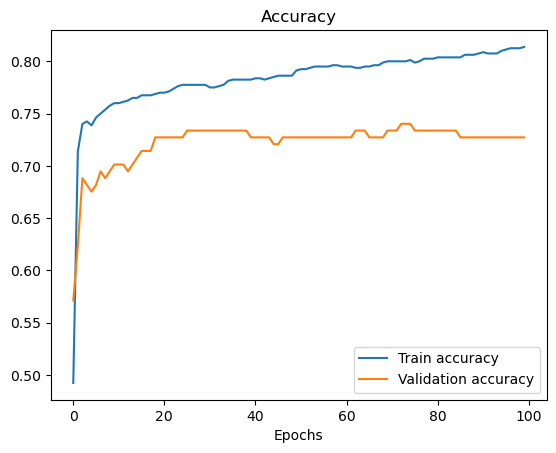

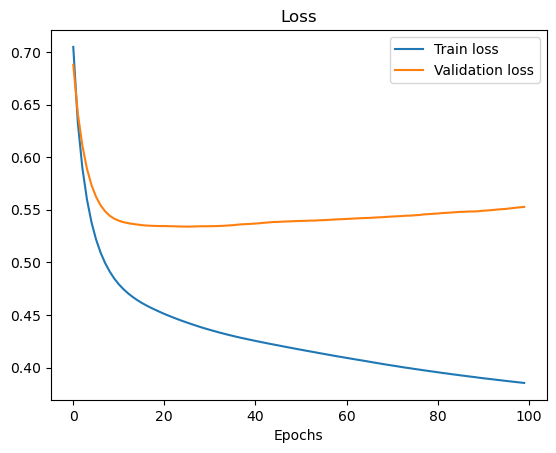

In [43]:
# Plot accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel("Epochs")
plt.show()

# Similar plot for loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title("Loss")
plt.xlabel("Epochs")
plt.show()

In [44]:
pd.DataFrame({'ytest':ytest,'pred':test_pred})

,ytest,pred
44,0,1
672,0,0
700,0,0
630,1,1
81,0,0
389,0,0
387,1,1
408,1,1
163,0,0
335,0,1


# Using library KERAS_TUNER to optimize all parametrs

In [45]:
import keras_tuner as kt

> Steps:

    1. create a function
    2. create a tuner object and pass the function and objective in the tuner object
    3. train the tuner object with training data to find best model

**hp** is the hyper paramater object which provide followinf methods:
- hp.Int()
- hp.Float()
- hp.Boolean()
- hp.Choice()

to handle various situations while tuning the parameters

### Keras Tuner to Hypertune:
- How to select appropriate optimizer
- learning rate of optimizer
- No. of neurons in a layer
- How to select no. of layers
- All in one model

## Optimizer tuner

In [46]:
#Step 1: create a function
def model_optimizer(hp):
    model=Sequential()
    model.add(Dense(32, activation='relu', input_dim=8))
    model.add(Dense(1, activation='sigmoid'))
    
    
    #Tune the optimizer, say with 5 tuners (https://keras.io/api/optimizers/)
    
    model.compile(
        optimizer =hp.Choice('optimizer', values =['adam','sgd','adamax','lion','rmsprop','adadelta'] ),
        loss='binary_crossentropy',
        metrics =['accuracy']
    )
    
    return model

In [47]:
# Step 2: create a tuner object (func_name, objective, max_trials)
tuner = kt.RandomSearch(model_optimizer, objective='val_accuracy', max_trials=10, project_name ='optimizer_tuner' )

E:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# Step 3: train the tuner object
# epochs =10
tuner.search(smote_xtrain, smote_ytrain, epochs = 10, validation_data =(xtest, ytest), shuffle = False)
tuner.results_summary()

Trial 6 Complete [00h 00m 05s]
val_accuracy: 0.7077922224998474

Best val_accuracy So Far: 0.7467532753944397
Total elapsed time: 00h 00m 26s
Results summary
Results in .\optimizer_tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
optimizer: lion
Score: 0.7467532753944397

Trial 02 summary
Hyperparameters:
optimizer: adamax
Score: 0.7272727489471436

Trial 03 summary
Hyperparameters:
optimizer: sgd
Score: 0.7272727489471436

Trial 04 summary
Hyperparameters:
optimizer: rmsprop
Score: 0.7207792401313782

Trial 05 summary
Hyperparameters:
optimizer: adam
Score: 0.7077922224998474

Trial 00 summary
Hyperparameters:
optimizer: adadelta
Score: 0.5714285969734192


**The best optimizer for this use-case is:**

In [49]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'lion'}

In [50]:
# nowl lets tune the learning rate

from tensorflow.keras.optimizers import Adamax
#Step 1: create a function
def model_optimizer_rate(hp):
    model=Sequential()
    model.add(Dense(32, activation='relu', input_dim=8))
    model.add(Dense(1, activation='sigmoid'))
    
    
    #Tune the optimizer, say with 5 tuners (https://keras.io/api/optimizers/)
    
    model.compile(
        optimizer =Adamax(learning_rate =hp.Choice('learn_rate', values =[0.1,0.01,0.001,0.0001])),
        loss='binary_crossentropy',
        metrics =['accuracy'])
    
    return model

In [51]:
tuner_rate =kt.RandomSearch(model_optimizer_rate, objective='val_accuracy', max_trials=4, project_name ='learn_rate')

In [52]:
tuner_rate.search(smote_xtrain, smote_ytrain, epochs = 10, validation_data =(xtest, ytest), shuffle = False)
tuner_rate.results_summary()

Trial 4 Complete [00h 00m 04s]
val_accuracy: 0.7532467246055603

Best val_accuracy So Far: 0.7532467246055603
Total elapsed time: 00h 00m 15s
Results summary
Results in .\learn_rate
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
learn_rate: 0.1
Score: 0.7532467246055603

Trial 2 summary
Hyperparameters:
learn_rate: 0.01
Score: 0.7207792401313782

Trial 0 summary
Hyperparameters:
learn_rate: 0.001
Score: 0.701298713684082

Trial 1 summary
Hyperparameters:
learn_rate: 0.0001
Score: 0.5714285969734192


### The learning rate best suited for our use-case is:

In [53]:
tuner_rate.get_best_hyperparameters()[0].values

{'learn_rate': 0.1}

In [54]:
# FETCHING the best model (adam, 0.1) and checking the metrics

In [55]:
best_model=tuner_rate.get_best_models(num_models =1)[0]

E:\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adamax', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [56]:
best_model.fit(smote_xtrain,smote_ytrain, initial_epoch=10, epochs= 100, validation_data=(xtest,ytest), shuffle = False)

Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7699 - loss: 0.4535 - val_accuracy: 0.6948 - val_loss: 0.8228
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7424 - loss: 0.5776 - val_accuracy: 0.7597 - val_loss: 0.5395
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7870 - loss: 0.4238 - val_accuracy: 0.7338 - val_loss: 0.5756
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8027 - loss: 0.4072 - val_accuracy: 0.7532 - val_loss: 0.5870
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.4126 - val_accuracy: 0.7532 - val_loss: 0.5917
Epoch 16/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8007 - loss: 0.4066 - val_accuracy: 0.7662 - val_loss: 0.5947
Epoch 17/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8058 - loss: 0.3987 - val_accuracy: 0.7597 - val_loss: 0.6094
Epoch 18/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8065 - loss: 0.3958 - val_accuracy: 0

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8936 - loss: 0.2623 - val_accuracy: 0.7273 - val_loss: 1.0108
Epoch 62/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8955 - loss: 0.2562 - val_accuracy: 0.7468 - val_loss: 0.9796
Epoch 63/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8901 - loss: 0.2624 - val_accuracy: 0.7403 - val_loss: 1.0386
Epoch 64/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8837 - loss: 0.2589 - val_accuracy: 0.7273 - val_loss: 1.0072
Epoch 65/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8915 - loss: 0.2533 - val_accuracy: 0.7338 - val_loss: 1.0534
Epoch 66/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9017 - loss: 0.2472 - val_accuracy: 0.7403 - val_loss: 1.0399
Epoch 67/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8927 - loss: 0.2508 - val_accuracy: 0.7338 - val_loss: 1.1151
Epoch 68/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8989 - loss: 0.2478 - val_accuracy: 0.7338 - val_lo

In [57]:
train_pred = [1 if i>0.5 else 0 for i in best_model.predict(smote_xtrain)]
test_pred =[1 if i>0.5 else 0 for i in best_model.predict(xtest)]
print('Training metrics')
print('accuracy_score: ',accuracy_score(smote_ytrain, train_pred))
print('recall_score: ',recall_score(smote_ytrain, train_pred))
print('Testing metrics')
print('accuracy_score: ',accuracy_score(ytest, test_pred))
print('recall_score: ',recall_score(ytest, test_pred))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Training metrics
accuracy_score:  0.94
recall_score:  0.96
Testing metrics
accuracy_score:  0.7467532467532467
recall_score:  0.7037037037037037


***

## No. of neurons in a layer

In [58]:
#Step 1: create a function
def model_num_neurons(hp):
    model=Sequential()
    
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), # no.of neurons tuner
        activation='relu', 
        input_dim=8))
    model.add(Dense(1, activation='sigmoid'))
    
    
    #Tune the optimizer, say with 5 tuners (https://keras.io/api/optimizers/)
    
    model.compile(
        optimizer =Adamax(learning_rate=0.1), # values =['adam','sgd','adamax','lion'] 
        loss='binary_crossentropy',
        metrics =['accuracy']
    )
    
    return model

In [59]:
# Step 2: create a tuner object (func_name, objective, max_trials)
tuner_neuron = kt.RandomSearch(model_num_neurons, objective='val_accuracy', max_trials=10, project_name="neuron_num" )

E:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
# Step 3: train the tuner object
tuner_neuron.search(smote_xtrain, smote_ytrain, epochs = 5, validation_data =(xtest, ytest), shuffle = False)
tuner_neuron.results_summary()

Trial 10 Complete [00h 00m 02s]
val_accuracy: 0.7532467246055603

Best val_accuracy So Far: 0.7662337422370911
Total elapsed time: 00h 00m 38s
Results summary
Results in .\neuron_num
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 03 summary
Hyperparameters:
units: 512
Score: 0.7662337422370911

Trial 00 summary
Hyperparameters:
units: 64
Score: 0.7532467246055603

Trial 02 summary
Hyperparameters:
units: 128
Score: 0.7532467246055603

Trial 09 summary
Hyperparameters:
units: 416
Score: 0.7532467246055603

Trial 06 summary
Hyperparameters:
units: 192
Score: 0.7467532753944397

Trial 01 summary
Hyperparameters:
units: 320
Score: 0.7402597665786743

Trial 05 summary
Hyperparameters:
units: 224
Score: 0.7402597665786743

Trial 07 summary
Hyperparameters:
units: 352
Score: 0.7337662577629089

Trial 08 summary
Hyperparameters:
units: 160
Score: 0.7337662577629089

Trial 04 summary
Hyperparameters:
units: 96
Score: 0.7207792401313782


### The No. of neurons that works best, units: 

In [61]:
tuner_neuron.get_best_hyperparameters()[0].values

{'units': 512}

In [62]:
# a=Sequential()
# a.add(Dense(384, activation='relu', input_dim =8))
# a.add(Dense(1, activation='sigmoid'))

# a.compile(optimizer =Adam(learning_rate=0.1), loss= 'binary_crossentropy', metrics= ['accuracy'])

# a.fit(xtrain, ytrain, batch_size =32, epochs =100, validation_data =(xtest, ytest))

In [63]:
best_model= tuner_neuron.get_best_models(num_models=1)[0]

E:\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adamax', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [64]:
best_model.fit(smote_xtrain,smote_ytrain, initial_epoch=5, epochs= 100, validation_data=(xtest,ytest), shuffle=False)

Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7414 - loss: 0.6005 - val_accuracy: 0.6234 - val_loss: 1.4812
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6811 - loss: 0.9041 - val_accuracy: 0.6623 - val_loss: 0.8767
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7137 - loss: 0.6270 - val_accuracy: 0.7468 - val_loss: 0.5788
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7714 - loss: 0.4416 - val_accuracy: 0.7143 - val_loss: 0.5972
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7852 - loss: 0.4270 - val_accuracy: 0.7143 - val_loss: 0.6257
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7959 - loss: 0.4242 - val_accuracy: 0.7078 - val_loss: 0.6213
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7995 - loss: 0.4055 - val_accuracy: 0.7078 - val_loss: 0.6229
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8055 - loss: 0.3958 - val_accuracy: 0.707

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9428 - loss: 0.2011 - val_accuracy: 0.7143 - val_loss: 1.8460
Epoch 57/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9175 - loss: 0.2244 - val_accuracy: 0.6558 - val_loss: 1.7766
Epoch 58/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9262 - loss: 0.2274 - val_accuracy: 0.7013 - val_loss: 1.5593
Epoch 59/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9438 - loss: 0.1857 - val_accuracy: 0.7468 - val_loss: 1.5324
Epoch 60/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9652 - loss: 0.0917 - val_accuracy: 0.7403 - val_loss: 1.5048
Epoch 61/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9822 - loss: 0.0650 - val_accuracy: 0.7468 - val_loss: 1.5724
Epoch 62/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9715 - loss: 0.0740 - val_accuracy: 0.7273 - val_loss: 1.6594
Epoch 63/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9743 - loss: 0.0884 - val_accuracy: 0.7208 - val_lo

In [65]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,365 (60.02 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,244 (40.02 KB)

In [66]:
train_pred = [1 if i>0.5 else 0 for i in best_model.predict(smote_xtrain)]
test_pred =[1 if i>0.5 else 0 for i in best_model.predict(xtest)]
print('Training metrics')
print('accuracy_score: ',accuracy_score(smote_ytrain, train_pred))
print('recall_score: ',recall_score(smote_ytrain, train_pred))
print('Testing metrics')
print('accuracy_score: ',accuracy_score(ytest, test_pred))
print('recall_score: ',recall_score(ytest, test_pred))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Training metrics
accuracy_score:  0.99875
recall_score:  1.0
Testing metrics
accuracy_score:  0.7402597402597403
recall_score:  0.6111111111111112


***

## No. of layers

In [67]:
def model_layers(hp):
    
    model=Sequential()
    model.add(Dense(160, activation='relu', input_dim =8))
    
    # using loop, we will add layers starting with 1 till 10 layers,
    # we will create 10 models, 1st model with 1 hidden layer, 2nd with 2 hidden, ... 10th with 10 hidden
    
    # Tune no. of layers
    for i in range(hp.Int('num_layers',0,10)): # step by default is 1, if not provided
        model.add(Dense(hp.Int('units'+str(i), 32,512, step=32), activation ='relu'))
        if hp.Boolean("dropout"+str(i)):
            model.add(Dropout(hp.Choice('dropout_rate'+str(i),values =[i/10 for i in range(1,10)])))
     
    model.add(Dense(1, activation ='sigmoid')) # output_layer
    
    model.compile(optimizer =Adamax(learning_rate =0.1), loss ='binary_crossentropy', metrics =['accuracy'])
    
    
    return model

In [68]:
tuner_layers = kt.RandomSearch(model_layers, objective ='val_accuracy', max_trials =20, project_name ='num_layers')

E:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
tuner_layers.search(smote_xtrain, smote_ytrain, validation_data =(xtest, ytest), epochs =5, shuffle = False)
tuner_layers.results_summary()

Trial 20 Complete [00h 00m 05s]
val_accuracy: 0.7207792401313782

Best val_accuracy So Far: 0.7402597665786743
Total elapsed time: 00h 01m 52s
Results summary
Results in .\num_layers
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 17 summary
Hyperparameters:
num_layers: 1
units0: 224
dropout0: True
units1: 64
dropout1: False
units2: 192
dropout2: False
units3: 352
dropout3: False
units4: 256
dropout4: True
units5: 64
dropout5: False
units6: 32
dropout6: False
units7: 480
dropout7: False
units8: 96
dropout8: False
units9: 288
dropout9: False
dropout_rate0: 0.8
dropout_rate1: 0.3
dropout_rate3: 0.4
dropout_rate5: 0.2
dropout_rate6: 0.3
dropout_rate9: 0.4
dropout_rate7: 0.1
dropout_rate2: 0.6
dropout_rate4: 0.2
dropout_rate8: 0.1
Score: 0.7402597665786743

Trial 03 summary
Hyperparameters:
num_layers: 1
units0: 288
dropout0: True
units1: 256
dropout1: False
units2: 128
dropout2: True
units3: 352
dropout3: True
units4: 128
dropout4: True
units5: 192
dropout5: 

In [70]:
tuner_layers.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units0': 224,
 'dropout0': True,
 'units1': 64,
 'dropout1': False,
 'units2': 192,
 'dropout2': False,
 'units3': 352,
 'dropout3': False,
 'units4': 256,
 'dropout4': True,
 'units5': 64,
 'dropout5': False,
 'units6': 32,
 'dropout6': False,
 'units7': 480,
 'dropout7': False,
 'units8': 96,
 'dropout8': False,
 'units9': 288,
 'dropout9': False,
 'dropout_rate0': 0.8,
 'dropout_rate1': 0.3,
 'dropout_rate3': 0.4,
 'dropout_rate5': 0.2,
 'dropout_rate6': 0.3,
 'dropout_rate9': 0.4,
 'dropout_rate7': 0.1,
 'dropout_rate2': 0.6,
 'dropout_rate4': 0.2,
 'dropout_rate8': 0.1}

In [71]:
tuner_layers.get_best_models()[0].summary()

E:\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adamax', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 160)            │         1,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 224)            │        36,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,729 (147.38 KB)

 Trainable params: 37,729 (147.38 KB)

 Non-trainable params: 0 (0.00 B)

# Final including all params

```python
def model_final(hp):
    model = Sequential()
    
    counter =0
    
    # Tune no. of layers
    for i in range(hp.Int('num_layers',1,10)):
        
        if counter == 0:
            
            # Tune no. of neurons in each layer
            model.add(Dense(hp.Int('units'+str(i), 32,512,step=32), activation ='relu', input_dim=8))
            # Tune if Dropout layer is needed
            if hp.Boolean('dropout'):
                # Tune rate for Dropout layer
                model.add(Dropout(hp.Choice('dropout_rate'+str(i), values =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
            
        else:
            model.add(Dense(hp.Int('units'+str(i), 32,512,step=32), activation ='relu'))
            if hp.Boolean('dropout'):
                model.add(Dropout(hp.Choice('dropout_rate_lower'+str(i), values =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
            
    model.add(Dense(1, activation='sigmoid'))     #output layer
    
    # Tune the optimizer (As now the architecture has changed)
    model.compile(optimizer =Adam('learning_rate', values,
                 loss='binary_crossentropy',
                 metrics= ['accuracy'])
                 # Tune the learning_rate of optimizer
                #learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log"
    
    return model
                  
tuner_final = kt.RandomSearch(model_final, objective= 'val_accuracy', max_trials=20, project_name ='final')
tuner_final.search(smote_xtrain, smote_ytrain, epochs =5, validation_data =(xtest, ytest), batch_size=32)
                  
tuner_final.get_best_hyperparameters()[0].values
```

### Including all findings
    - optimizer = Adamax(learning_rate =0.1)
    - input layer Dense(160, 'relu')
    -

In [72]:
print("Training Loss & Accuracy: ", best_model.evaluate(xtrain,ytrain))
print("Testing Loss & Accuracy: ", best_model.evaluate(xtest,ytest))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9977 - loss: 0.0117 
Training Loss & Accuracy:  [0.011249025352299213, 0.9983713626861572]
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7047 - loss: 2.2440 
Testing Loss & Accuracy:  [2.0207769870758057, 0.7402597665786743]


In [73]:
best_model.fit(smote_xtrain,smote_ytrain, initial_epoch=5, epochs= 100, validation_data=(xtest,ytest))

Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9975 - loss: 0.0141 - val_accuracy: 0.7338 - val_loss: 1.9489
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9964 - loss: 0.0198 - val_accuracy: 0.7403 - val_loss: 2.1134
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9811 - loss: 0.0594 - val_accuracy: 0.7273 - val_loss: 2.2087
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9732 - loss: 0.1322 - val_accuracy: 0.7403 - val_loss: 1.9438
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9602 - loss: 0.1740 - val_accuracy: 0.7338 - val_loss: 2.2504
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9596 - loss: 0.1477 - val_accuracy: 0.7143 - val_loss: 2.1655
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9741 - loss: 0.1598 - val_accuracy: 0.6948 - val_loss: 2.7426
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9756 - loss: 0.0567 - val_accuracy: 0.7078

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.7143 - val_loss: 2.3262
Epoch 57/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.7013 - val_loss: 2.3354
Epoch 58/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.7143 - val_loss: 2.3543
Epoch 59/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.7013 - val_loss: 2.3612
Epoch 60/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.7208 - val_loss: 2.3657
Epoch 61/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.7078 - val_loss: 2.3503
Epoch 62/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.7143 - val_loss: 2.3814
Epoch 63/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.7143 - val_lo

In [74]:
def last_model(hp):
    model=Sequential()
    model.add(Dense(160,input_dim=8, activation = 'relu'))
    if hp.Boolean('dropout'):
        model.add(Dropout(hp.Float('rate', values =[i/10 for i in range(1,10)])))
        
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer =Adamax(learning_rate =0.1, ), loss= 'binary_crossentropy', metrics =['accuracy'])
    
    return model

In [75]:
final=kt.RandomSearch(last_model, max_trials =2, objective ='val_accuracy', project_name='hello')
final.search(smote_xtrain,smote_ytrain,  epochs= 10, validation_data=(xtest,ytest))

Trial 2 Complete [00h 00m 04s]
val_accuracy: 0.7727272510528564

Best val_accuracy So Far: 0.7727272510528564
Total elapsed time: 00h 00m 05s


In [76]:
final.get_best_hyperparameters()[0].values

{'dropout': False}

In [77]:
# so final model looks like
model=Sequential()
model.add(Dense(160,input_dim=8, activation = 'relu'))
# dropout not needed
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer =Adamax(learning_rate =0.1, ), loss= 'binary_crossentropy', metrics =['accuracy'])

history= model.fit(smote_xtrain,smote_ytrain,  epochs= 100, validation_data=(xtest,ytest), shuffle = False)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7072 - loss: 0.6220 - val_accuracy: 0.3506 - val_loss: 1.9454
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5833 - loss: 1.0961 - val_accuracy: 0.7208 - val_loss: 0.6220
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7240 - loss: 0.5358 - val_accuracy: 0.7273 - val_loss: 0.5688
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7620 - loss: 0.4597 - val_accuracy: 0.7143 - val_loss: 0.5923
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7784 - loss: 0.4691 - val_accuracy: 0.7338 - val_loss: 0.5876
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7829 - loss: 0.4550 - val_accuracy: 0.7078 - val_loss: 0.5874
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7828 - loss: 0.4450 - val_accuracy: 0.7013 - val_loss: 0.6067
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7853 - loss: 0.4477 - val_accuracy: 0.6948 - 

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9249 - loss: 0.1849 - val_accuracy: 0.7013 - val_loss: 1.2586
Epoch 52/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9341 - loss: 0.1648 - val_accuracy: 0.7013 - val_loss: 1.2286
Epoch 53/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9240 - loss: 0.1702 - val_accuracy: 0.6883 - val_loss: 1.2834
Epoch 54/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9391 - loss: 0.1524 - val_accuracy: 0.7078 - val_loss: 1.2763
Epoch 55/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9414 - loss: 0.1445 - val_accuracy: 0.6818 - val_loss: 1.3732
Epoch 56/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9378 - loss: 0.1485 - val_accuracy: 0.7013 - val_loss: 1.3619
Epoch 57/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9526 - loss: 0.1276 - val_accuracy: 0.6818 - val_loss: 1.4333
Epoch 58/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9409 - loss: 0.1349 - val_accuracy: 0.6753 - val_lo

In [78]:
model.evaluate(xtest, ytest)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6752 - loss: 2.2351 


[2.1008706092834473, 0.6948052048683167]

In [79]:
train_pred = [1 if i>0.5 else 0 for i in model.predict(xtrain)]
test_pred =[1 if i>0.5 else 0 for i in model.predict(xtest)]
print('Training metrics')
print('accuracy_score: ',accuracy_score(ytrain, train_pred))
print('recall_score: ',recall_score(ytrain, train_pred))
print('Testing metrics')
print('accuracy_score: ',accuracy_score(ytest, test_pred))
print('recall_score: ',recall_score(ytest, test_pred))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training metrics
accuracy_score:  1.0
recall_score:  1.0
Testing metrics
accuracy_score:  0.6948051948051948
recall_score:  0.5925925925925926


## Observation:

1. Compared to a ML algorithm, ANN with tuning has helped us get a more generalized model with:
- training accuracy of 78.1759%
- testing accuracy of 75.9740 %

In [80]:
predicted_xtest =[1 if i>0.5 else 0 for i in best_model.predict(xtest)]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [81]:
accuracy_score(ytest, predicted_xtest)

0.7272727272727273